# JSON Based Data Exercise
****
Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.
****


In [1]:
# Import necessary packages
import pandas as pd
import json 
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize


In [2]:
# Load world bank data as Pandas dataframe and explore dataset
world_bank_df = pd.read_json('data/world_bank_projects.json')
world_bank_df.head()

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Percent': 30, 'Name': 'Other economic manage...","[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,{'$oid': '52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,TI,IBRD,Active,Y,"{'Percent': 46, 'Name': 'Regional integration'}","[{'code': '47', 'name': 'Regional integration'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en
3,{'$oid': '52b213b38594d8a2be17c783'},2014,October,2013-10-31T00:00:00Z,MIN. OF PLANNING AND INT'L COOPERATION,NaN,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",...,JB,IBRD,Active,N,"{'Percent': 50, 'Name': 'Participation and civ...","[{'code': '57', 'name': 'Participation and civ...","59,57",0,1500000,http://www.worldbank.org/projects/P144665?lang=en
4,{'$oid': '52b213b38594d8a2be17c784'},2014,October,2013-10-31T00:00:00Z,MINISTRY OF FINANCE,2019-04-30T00:00:00Z,Kingdom of Lesotho!$!LS,LS,Kingdom of Lesotho,Lesotho,...,"FH,YW,YZ",IBRD,Active,N,"{'Percent': 30, 'Name': 'Export development an...","[{'code': '45', 'name': 'Export development an...","41,45",13100000,13100000,http://www.worldbank.org/projects/P144933/seco...


In [3]:
# Show all column names 
world_bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 50 columns):
_id                         500 non-null object
approvalfy                  500 non-null int64
board_approval_month        500 non-null object
boardapprovaldate           500 non-null object
borrower                    485 non-null object
closingdate                 370 non-null object
country_namecode            500 non-null object
countrycode                 500 non-null object
countryname                 500 non-null object
countryshortname            500 non-null object
docty                       446 non-null object
envassesmentcategorycode    430 non-null object
grantamt                    500 non-null int64
ibrdcommamt                 500 non-null int64
id                          500 non-null object
idacommamt                  500 non-null int64
impagency                   472 non-null object
lendinginstr                495 non-null object
lendinginstrtype            495 non

****
### Q1: Find the 10 countries with the most projects

In [4]:
# Count number of projects by the 'countryname'
country_projects = world_bank_df.countryname.value_counts()

# Select the ten countries with the most projects
top_countries = country_projects.head(10)

# Print the top 10 countries in terms of most projects
print(top_countries)

People's Republic of China         19
Republic of Indonesia              19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Nepal                              12
Kingdom of Morocco                 12
People's Republic of Bangladesh    12
Republic of Mozambique             11
Africa                             11
Name: countryname, dtype: int64


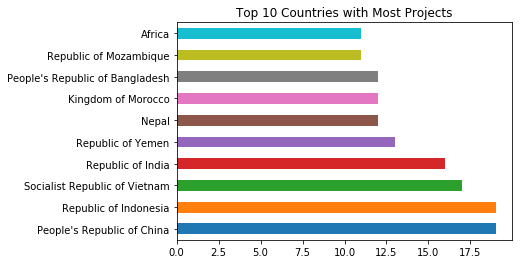

In [5]:
top_countries.plot(kind='barh')
plt.title('Top 10 Countries with Most Projects')
plt.show()

****
### Q2: Find the top 10 major project themes (using column 'mjtheme_namecode')

+ My initial approach worked, but I wanted to try out the json_normalize function to create tables from nested elements

In [6]:
# Create new DataFrame called themes to split the column 'mjtheme_namecode' into two columns: code and name

# INITIAL APPROACH 
# for project in json_df['mjtheme_namecode']:
#    for row in project:
#        themes = themes.append(pd.DataFrame([row], columns = row.keys()))
# themes.head()

# OPTIMAL APPROACH
themes = pd.DataFrame(columns = ['code', 'name'])
for row in world_bank_df['mjtheme_namecode']:
    themes = themes.append(json_normalize(row))

# Reset index
themes.reset_index(drop = True, inplace = True)
themes.head()

,code,name
0,8,Human development
1,11,
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration


+ I noticed in the DataFrame above that there is a missing name value. Below I counted the number of project first by code number, then by name to see if there was a difference in count. There indeed was and that ties into the third question

In [7]:
# Count the number of projects per project theme by the code number. Print the top 10.
themes_by_code = themes.code.value_counts()
themes_by_code.head(10)

11    250
10    216
8     210
2     199
6     168
4     146
7     130
5      77
9      50
1      38
Name: code, dtype: int64

In [8]:
# Count the number of projects per project theme by theme name. Print the top 10.
themes_by_name = themes.name.value_counts()
themes_by_name.head(10)

Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
                                                122
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
Name: name, dtype: int64

****
### Q3. Above you will notice that some entries have only the code and the name is missing. Create a dataframe                  with the missing names filled in.

##### Method 1

In [9]:
# Get the mode value of 'name' for each code number.
names = themes.groupby('code')['name'].agg(pd.Series.mode)

In [10]:
# Map out the mode value of 'name' into the 'themes' dataframe
themes['name'] = themes['code'].map(names)

# Count the number of projects per project theme by theme name. Print the top 10.
themes_count = themes.name.value_counts()
themes_count.head(10)

Environment and natural resources management    250
Rural development                               216
Human development                               210
Public sector governance                        199
Social protection and risk management           168
Financial and private sector development        146
Social dev/gender/inclusion                     130
Trade and integration                            77
Urban development                                50
Economic management                              38
Name: name, dtype: int64

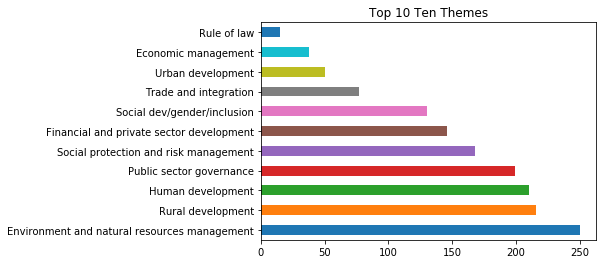

In [12]:
themes_count.plot(kind='barh')
plt.title('Top 10 Ten Themes')
plt.show()

##### Method 2
+ Alternative method in the works